## Contents
##### [Importing Libraries](#Libraries)
##### [Loading the data and cleaning](#Loading-the-data)
##### [Text preprocess functions](#Text-preprocess-functions)
##### [Bag-of-Words -  all documents](#Bag-of-Words)
##### [TF-IDF prep](#TF-IDF)
##### [LDA model](#LDA)
##### [LDA + TF-IDF model](#LDA-+-TF-IDF)
##### [Testing the models](#Testing)
##### [Test on documents from current news](#Test-on-new-documents)
##### [Clustering ](#Clustering)
##### [Building the dataframe for the clustering ](#Building-the-dataframe-for-the-clustering)
##### [Getting the confidences to each topic ](#Getting-the-confidences-to-each-topic)
##### [Clustering](#Clustering1)
##### [PCA + Graphs](#Applying-PCA)
##### [LDA with TF_LDF ](#LDA-with-TF_LDF)
##### [Clustering](#Clustering2)
##### [PCA + Graphs](#Applying-PCA-2)

#### Libraries

In [1]:
import re, string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string

from pprint import pprint

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
###
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
###
from nltk import pos_tag, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.decomposition import TruncatedSVD, NMF

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim import corpora, models
from nltk.stem.porter import *

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Busss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Busss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Loading the data

In [87]:
df = pd.read_csv('data/data.csv')
df.shape

C:\Users\Busss\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(204135, 12)

In [88]:
df.head()

,id,title,author,date,content,year,month,publication,category,digital,section,url
0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN


#### Removing all columns and keeping only the 'content' column

In [89]:
remove = [i for i in df.columns if i!='title']

In [90]:
df.drop(remove, axis = 1, inplace=True)
df.head()

,title
0,Agent Cooper in Twin Peaks is the audience: on...
1,"AI, the humanity!"
2,The Viral Machine
3,How Anker is beating Apple and Samsung at thei...
4,Tour Black Panther’s reimagined homeland with ...


In [91]:
df.shape

(204135, 1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204135 entries, 0 to 204134
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   204132 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [93]:
df.dropna(inplace=True)

In [94]:
df.shape

(204132, 1)

#### Text preprocess functions

In [95]:
stemmer = SnowballStemmer("english")

def lem_stem(word):
    return stemmer.stem(WordNetLemmatizer().lemmatize(word))

def preprocess(text):
    return [lem_stem(token) for token in gensim.utils.simple_preprocess(text) if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3]            


#### Checking the functions at work

In [96]:
print('original:',df['title'].iloc[3][:100])
print("after:",preprocess(df['title'].iloc[3][:100]))

original: How Anker is beating Apple and Samsung at their own accessory game
after: ['anker', 'beat', 'appl', 'samsung', 'accessori', 'game']


#### Preprocessing the data

In [97]:
pp_data = df['title'].map(preprocess)

In [98]:
pp_data[:10]

0    [agent, cooper, twin, peak, audienc, delight, ...
1                                              [human]
2                                      [viral, machin]
3        [anker, beat, appl, samsung, accessori, game]
4    [tour, black, panther, reimagin, homeland, neh...
5                                     [instant, recal]
6                                     [massiv, attack]
7                                       [futur, agenc]
8                                       [flight, risk]
9                                       [brain, drain]
Name: title, dtype: object

#### Bag-of-Words

In [99]:
dict_of_words = gensim.corpora.Dictionary(pp_data)

In [100]:
for i, (key, value) in enumerate(dict_of_words.iteritems()):
    print(key, value)
    if i == 10:
        break

0 agent
1 audienc
2 cooper
3 delight
4 disintegr
5 peak
6 twin
7 human
8 machin
9 viral
10 accessori


#### Total number of words in dict:

In [101]:
print('total:',len(dict_of_words.iteritems()))

total: 32165


#### Filter out tokens
remove < 'no_below', 
remove > 'no_above',
then keep only the first 'keep_n' most

In [102]:
dict_of_words.filter_extremes(no_below=15, no_above=0.1, keep_n=50000)

In [103]:
bow_for_docs = [dict_of_words.doc2bow(i) for i in pp_data]
bow_for_docs[:10]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1)],
 [(7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1)],
 [(23, 1), (24, 1)],
 [(25, 1), (26, 1)],
 [(27, 1), (28, 1)],
 [(29, 1), (30, 1)]]

#### How many words in the title at the i-th location
(i==2 in this case)

In [104]:
len(bow_for_docs[3])

5

#### Check the words at that location
(id, count)

##### Ordered by how they appear in the content - top 10

In [105]:
bow_for_docs[3]

[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]

##### Ordered by the most frequent - top 10

In [106]:
sorted(bow_for_docs[3],  key=lambda x: x[1], reverse=True)[:10]

[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]

##### Ordered by the least frequent - top 10

In [107]:
sorted(bow_for_docs[3],  key=lambda x: x[1])[:10]

[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]

#### Check the actual words

In [108]:
limit = 10
space = '     '
tmp_words = bow_for_docs[3]

print(f' LOC  |   WORD NUMBER   |    WORD FREQ    | THE ACTUAL WORD ')
print('-------------------------------------------------------------')
for i in range(len(tmp_words)):
    num = str(tmp_words[i][0])
    while len(num) < 5: num = ' '+num
        
    freq = str(tmp_words[i][1])
    while len(freq) < 5: freq = ' '+freq

    loc = str(i)
    while len(loc) < 5: loc = ' '+loc

    print(f'{loc} | {space}{num}{space} | {space}{freq}{space} | {space}{dict_of_words[tmp_words[i][0]]}')
    if i == limit: break
print(tmp_words)

 LOC  |   WORD NUMBER   |    WORD FREQ    | THE ACTUAL WORD 
-------------------------------------------------------------
    0 |          9      |          1      |      accessori
    1 |         10      |          1      |      appl
    2 |         11      |          1      |      beat
    3 |         12      |          1      |      game
    4 |         13      |          1      |      samsung
[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


### TF-IDF

In [109]:
idf = models.TfidfModel(bow_for_docs)

##### Transforming

In [110]:
tdf_data = idf[bow_for_docs]

##### (id, score)

In [111]:
for i in tdf_data:
    print(i)
    break

[(0, 0.3480650151787403), (1, 0.4209161975451784), (2, 0.4047524798643647), (3, 0.46501661778648373), (4, 0.4151525454802232), (5, 0.3863465271748787)]


### LDA
Training

In [112]:
lda = gensim.models.LdaMulticore(bow_for_docs, num_topics=5, id2word=dict_of_words, passes=10, workers=6)

##### Lets view the words

In [113]:
for i, topic in lda.print_topics(-1):
    print(f"Topic: {i} \nWords: {topic}\n---\n")
    


Topic: 0 
Words: 0.014*"woman" + 0.010*"review" + 0.010*"dy" + 0.008*"world" + 0.007*"best" + 0.007*"star" + 0.007*"life" + 0.006*"year" + 0.006*"game" + 0.006*"week"
---

Topic: 1 
Words: 0.015*"hous" + 0.015*"white" + 0.012*"kill" + 0.012*"court" + 0.011*"year" + 0.010*"polic" + 0.010*"dead" + 0.010*"death" + 0.008*"offic" + 0.008*"shoot"
---

Topic: 2 
Words: 0.013*"state" + 0.011*"say" + 0.010*"attack" + 0.010*"russia" + 0.008*"report" + 0.007*"school" + 0.007*"syria" + 0.006*"student" + 0.005*"isi" + 0.005*"investig"
---

Topic: 3 
Words: 0.040*"opinion" + 0.029*"breitbart" + 0.021*"donald" + 0.020*"clinton" + 0.012*"hillari" + 0.011*"presid" + 0.011*"north" + 0.009*"right" + 0.009*"korea" + 0.009*"obama"
---

Topic: 4 
Words: 0.011*"elect" + 0.010*"plan" + 0.009*"deal" + 0.009*"health" + 0.007*"million" + 0.006*"say" + 0.006*"care" + 0.006*"know" + 0.006*"china" + 0.006*"sign"
---



#### Topic Classification

In [114]:
'Topic: 0 Words: 0.015*"player" + 0.012*"season" + 0.009*"sport" + 0.008*"leagu" + 0.007*"coach" + 0.007*"olymp" + 0.006*"athlet" + 0.005*"footbal" + 0.005*"field" + 0.005*"ball"'

'Topic: 0 Words: 0.015*"player" + 0.012*"season" + 0.009*"sport" + 0.008*"leagu" + 0.007*"coach" + 0.007*"olymp" + 0.006*"athlet" + 0.005*"footbal" + 0.005*"field" + 0.005*"ball"'

### LDA + TF-IDF
Training

In [115]:
lda_idf = gensim.models.LdaMulticore(tdf_data, num_topics=5, id2word=dict_of_words, passes=15, workers=6)

In [116]:
for i, topic in lda_idf.print_topics(-1):
    print(f"Topic: {i} \nWords: {topic}\n---\n")

Topic: 0 
Words: 0.009*"opinion" + 0.006*"dy" + 0.006*"review" + 0.006*"best" + 0.005*"game" + 0.005*"world" + 0.005*"star" + 0.004*"woman" + 0.004*"love" + 0.004*"week"
---

Topic: 1 
Words: 0.009*"kill" + 0.008*"polic" + 0.007*"attack" + 0.006*"shoot" + 0.005*"opinion" + 0.005*"offic" + 0.005*"charg" + 0.004*"dead" + 0.004*"arrest" + 0.004*"student"
---

Topic: 2 
Words: 0.005*"health" + 0.005*"care" + 0.005*"year" + 0.004*"appl" + 0.004*"wall" + 0.004*"home" + 0.004*"street" + 0.003*"like" + 0.003*"california" + 0.003*"price"
---

Topic: 3 
Words: 0.022*"opinion" + 0.013*"clinton" + 0.012*"donald" + 0.008*"breitbart" + 0.008*"hillari" + 0.007*"read" + 0.007*"republican" + 0.007*"presid" + 0.007*"democrat" + 0.006*"elect"
---

Topic: 4 
Words: 0.008*"north" + 0.007*"korea" + 0.006*"court" + 0.006*"deal" + 0.005*"say" + 0.005*"china" + 0.005*"syria" + 0.004*"south" + 0.004*"obama" + 0.004*"plan"
---



#### Topic Classification

In [117]:
'Topic: 0 Words: 0.010*"olymp" + 0.009*"yanke" + 0.008*"player" + 0.007*"athlet" + 0.007*"met" + 0.006*"cuban" + 0.006*"cuba" + 0.006*"basebal" + 0.006*"leagu" + 0.006*"season"'

'Topic: 0 Words: 0.010*"olymp" + 0.009*"yanke" + 0.008*"player" + 0.007*"athlet" + 0.007*"met" + 0.006*"cuban" + 0.006*"cuba" + 0.006*"basebal" + 0.006*"leagu" + 0.006*"season"'

### Testing
###### Using these parameters

In [451]:
loc = 321
tmp_doc = pp_data[loc]
print(tmp_doc)

['watch', 'histori', 'movi', 'trailer', 'told', 'star', 'war']


###### Using this article 

In [452]:
print('original:',df['title'].iloc[loc])

original: Watch the history of the movie trailer, as told by Star Wars


#### LDA model

##### Lets check which topic 'tmp_doc' above belongs to

In [453]:
for i, conf in sorted(lda[bow_for_docs[loc]], key=lambda x: x[1]*-1):
    print(f"Score: {conf}\t \nTopic: {lda.print_topic(i, 10)}\n")
    

Score: 0.8995653390884399	 
Topic: 0.014*"woman" + 0.010*"review" + 0.010*"dy" + 0.008*"world" + 0.007*"best" + 0.007*"star" + 0.007*"life" + 0.006*"year" + 0.006*"game" + 0.006*"week"

Score: 0.025188632309436798	 
Topic: 0.013*"state" + 0.011*"say" + 0.010*"attack" + 0.010*"russia" + 0.008*"report" + 0.007*"school" + 0.007*"syria" + 0.006*"student" + 0.005*"isi" + 0.005*"investig"

Score: 0.02513842098414898	 
Topic: 0.040*"opinion" + 0.029*"breitbart" + 0.021*"donald" + 0.020*"clinton" + 0.012*"hillari" + 0.011*"presid" + 0.011*"north" + 0.009*"right" + 0.009*"korea" + 0.009*"obama"

Score: 0.025103487074375153	 
Topic: 0.015*"hous" + 0.015*"white" + 0.012*"kill" + 0.012*"court" + 0.011*"year" + 0.010*"polic" + 0.010*"dead" + 0.010*"death" + 0.008*"offic" + 0.008*"shoot"

Score: 0.025004087015986443	 
Topic: 0.011*"elect" + 0.010*"plan" + 0.009*"deal" + 0.009*"health" + 0.007*"million" + 0.006*"say" + 0.006*"care" + 0.006*"know" + 0.006*"china" + 0.006*"sign"



###### After viewing the original text and the cluster/classification is 'topic 0' which is movies/arrt/review with 72% confidence the model is correct.

### Testing LDA + TF-IDF model

In [121]:
for i, conf in sorted(lda_idf[bow_for_docs[loc]], key=lambda x: x[1]*-1):
    print(f"Score: {conf}\t \nTopic: {lda_idf.print_topic(i, 10)}\n")

Score: 0.7709375023841858	 
Topic: 0.009*"opinion" + 0.006*"dy" + 0.006*"review" + 0.006*"best" + 0.005*"game" + 0.005*"world" + 0.005*"star" + 0.004*"woman" + 0.004*"love" + 0.004*"week"

Score: 0.15238556265830994	 
Topic: 0.008*"north" + 0.007*"korea" + 0.006*"court" + 0.006*"deal" + 0.005*"say" + 0.005*"china" + 0.005*"syria" + 0.004*"south" + 0.004*"obama" + 0.004*"plan"

Score: 0.02585531212389469	 
Topic: 0.022*"opinion" + 0.013*"clinton" + 0.012*"donald" + 0.008*"breitbart" + 0.008*"hillari" + 0.007*"read" + 0.007*"republican" + 0.007*"presid" + 0.007*"democrat" + 0.006*"elect"

Score: 0.025744671002030373	 
Topic: 0.009*"kill" + 0.008*"polic" + 0.007*"attack" + 0.006*"shoot" + 0.005*"opinion" + 0.005*"offic" + 0.005*"charg" + 0.004*"dead" + 0.004*"arrest" + 0.004*"student"

Score: 0.025076964870095253	 
Topic: 0.005*"health" + 0.005*"care" + 0.005*"year" + 0.004*"appl" + 0.004*"wall" + 0.004*"home" + 0.004*"street" + 0.003*"like" + 0.003*"california" + 0.003*"price"



###### After viewing the original and the the cluster/classification. It appears that the model is 90% confident that the topic is 'topic 0' Which is movie/review/life. That is the correct classification for the document.


### Test on new documents
article from: https://www.arabnews.com

In [211]:
new_doc = 'Ghostbusters Learned From Force Awakens Mistakes (And It Worked Perfectly)'
bow = dict_of_words.doc2bow(preprocess(new_doc))

#### Testing LDA on new article

In [213]:
for i, conf in sorted(lda[bow], key=lambda x: x[1]*-1):
    print(f"Score: {conf}\t \nTopic: {lda.print_topic(i, 10)}\n")

Score: 0.3454083502292633	 
Topic: 0.011*"elect" + 0.010*"plan" + 0.009*"deal" + 0.009*"health" + 0.007*"million" + 0.006*"say" + 0.006*"care" + 0.006*"know" + 0.006*"china" + 0.006*"sign"

Score: 0.2594835162162781	 
Topic: 0.014*"woman" + 0.010*"review" + 0.010*"dy" + 0.008*"world" + 0.007*"best" + 0.007*"star" + 0.007*"life" + 0.006*"year" + 0.006*"game" + 0.006*"week"

Score: 0.2102363556623459	 
Topic: 0.040*"opinion" + 0.029*"breitbart" + 0.021*"donald" + 0.020*"clinton" + 0.012*"hillari" + 0.011*"presid" + 0.011*"north" + 0.009*"right" + 0.009*"korea" + 0.009*"obama"

Score: 0.15981455147266388	 
Topic: 0.013*"state" + 0.011*"say" + 0.010*"attack" + 0.010*"russia" + 0.008*"report" + 0.007*"school" + 0.007*"syria" + 0.006*"student" + 0.005*"isi" + 0.005*"investig"

Score: 0.0250572320073843	 
Topic: 0.015*"hous" + 0.015*"white" + 0.012*"kill" + 0.012*"court" + 0.011*"year" + 0.010*"polic" + 0.010*"dead" + 0.010*"death" + 0.008*"offic" + 0.008*"shoot"



#### Result
The LDA model has classified the aritcle correctly into review/life/movies. 55%confidence.

#### Testing LDA + TF-IDF on new article

In [127]:
for i, conf in sorted(lda_idf[bow], key=lambda x: x[1]*-1):
    print(f"Score: {conf}\t \nTopic: {lda_idf.print_topic(i, 10)}\n")

Score: 0.662559449672699	 
Topic: 0.009*"opinion" + 0.006*"dy" + 0.006*"review" + 0.006*"best" + 0.005*"game" + 0.005*"world" + 0.005*"star" + 0.004*"woman" + 0.004*"love" + 0.004*"week"

Score: 0.2595022916793823	 
Topic: 0.022*"opinion" + 0.013*"clinton" + 0.012*"donald" + 0.008*"breitbart" + 0.008*"hillari" + 0.007*"read" + 0.007*"republican" + 0.007*"presid" + 0.007*"democrat" + 0.006*"elect"

Score: 0.02643827721476555	 
Topic: 0.009*"kill" + 0.008*"polic" + 0.007*"attack" + 0.006*"shoot" + 0.005*"opinion" + 0.005*"offic" + 0.005*"charg" + 0.004*"dead" + 0.004*"arrest" + 0.004*"student"

Score: 0.025795241817831993	 
Topic: 0.005*"health" + 0.005*"care" + 0.005*"year" + 0.004*"appl" + 0.004*"wall" + 0.004*"home" + 0.004*"street" + 0.003*"like" + 0.003*"california" + 0.003*"price"

Score: 0.025704747065901756	 
Topic: 0.008*"north" + 0.007*"korea" + 0.006*"court" + 0.006*"deal" + 0.005*"say" + 0.005*"china" + 0.005*"syria" + 0.004*"south" + 0.004*"obama" + 0.004*"plan"



#### Result
The LDA+TF-IDF model has classified the aritcle correctly into review/life/movies.(57% confidence)

### Clustering

###### LDA model topics

In [589]:
print(['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health'])
lda.print_topics()

['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health']


[(0,
  '0.014*"woman" + 0.010*"review" + 0.010*"dy" + 0.008*"world" + 0.007*"best" + 0.007*"star" + 0.007*"life" + 0.006*"year" + 0.006*"game" + 0.006*"week"'),
 (1,
  '0.015*"hous" + 0.015*"white" + 0.012*"kill" + 0.012*"court" + 0.011*"year" + 0.010*"polic" + 0.010*"dead" + 0.010*"death" + 0.008*"offic" + 0.008*"shoot"'),
 (2,
  '0.013*"state" + 0.011*"say" + 0.010*"attack" + 0.010*"russia" + 0.008*"report" + 0.007*"school" + 0.007*"syria" + 0.006*"student" + 0.005*"isi" + 0.005*"investig"'),
 (3,
  '0.040*"opinion" + 0.029*"breitbart" + 0.021*"donald" + 0.020*"clinton" + 0.012*"hillari" + 0.011*"presid" + 0.011*"north" + 0.009*"right" + 0.009*"korea" + 0.009*"obama"'),
 (4,
  '0.011*"elect" + 0.010*"plan" + 0.009*"deal" + 0.009*"health" + 0.007*"million" + 0.006*"say" + 0.006*"care" + 0.006*"know" + 0.006*"china" + 0.006*"sign"')]

###### LDA+IDF model topics

In [590]:
lda_idf.print_topics()

[(0,
  '0.009*"opinion" + 0.006*"dy" + 0.006*"review" + 0.006*"best" + 0.005*"game" + 0.005*"world" + 0.005*"star" + 0.004*"woman" + 0.004*"love" + 0.004*"week"'),
 (1,
  '0.009*"kill" + 0.008*"polic" + 0.007*"attack" + 0.006*"shoot" + 0.005*"opinion" + 0.005*"offic" + 0.005*"charg" + 0.004*"dead" + 0.004*"arrest" + 0.004*"student"'),
 (2,
  '0.005*"health" + 0.005*"care" + 0.005*"year" + 0.004*"appl" + 0.004*"wall" + 0.004*"home" + 0.004*"street" + 0.003*"like" + 0.003*"california" + 0.003*"price"'),
 (3,
  '0.022*"opinion" + 0.013*"clinton" + 0.012*"donald" + 0.008*"breitbart" + 0.008*"hillari" + 0.007*"read" + 0.007*"republican" + 0.007*"presid" + 0.007*"democrat" + 0.006*"elect"'),
 (4,
  '0.008*"north" + 0.007*"korea" + 0.006*"court" + 0.006*"deal" + 0.005*"say" + 0.005*"china" + 0.005*"syria" + 0.004*"south" + 0.004*"obama" + 0.004*"plan"')]

#### Building the dataframe for the clustering
##### All data into one

In [591]:
mix = df.copy()
print(mix.shape)
mix.head()

(204132, 1)


,title
0,Agent Cooper in Twin Peaks is the audience: on...
1,"AI, the humanity!"
2,The Viral Machine
3,How Anker is beating Apple and Samsung at thei...
4,Tour Black Panther’s reimagined homeland with ...


In [592]:
pp_data[:5]

0    [agent, cooper, twin, peak, audienc, delight, ...
1                                              [human]
2                                      [viral, machin]
3        [anker, beat, appl, samsung, accessori, game]
4    [tour, black, panther, reimagin, homeland, neh...
Name: title, dtype: object

In [593]:
pp_ = pd.DataFrame({'clean':pp_data})
print(pp_.shape)
pp_.head()

(204132, 1)


,clean
0,"[agent, cooper, twin, peak, audienc, delight, ..."
1,[human]
2,"[viral, machin]"
3,"[anker, beat, appl, samsung, accessori, game]"
4,"[tour, black, panther, reimagin, homeland, neh..."


In [594]:
num = pd.DataFrame({'vectorized':bow_for_docs})
print(num.shape)
num.head()

(204132, 1)


,vectorized
0,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]"
1,"[(6, 1)]"
2,"[(7, 1), (8, 1)]"
3,"[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]"
4,"[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ..."


In [595]:
num_tdf = pd.DataFrame({'tdf_vectorized':tdf_data})
print(num_tdf.shape)
num_tdf.head()

C:\Users\Busss\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.array(v, copy=False)


(204132, 1)


C:\Users\Busss\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1672: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  subarr = np.array(values, dtype=dtype, copy=copy)


,tdf_vectorized
0,"[(0, 0.3480650151787403), (1, 0.42091619754517..."
1,"[(6, 1.0)]"
2,"[(7, 0.6856827453884325), (8, 0.72790052388810..."
3,"[(9, 0.6391980317756802), (10, 0.3537230897492..."
4,"[(14, 0.23014573543762717), (15, 0.39767125927..."


In [596]:
mix = pd.concat([mix, pp_, num, num_tdf], axis=1)
mix.head()

,title,clean,vectorized,tdf_vectorized
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517..."
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]"
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810..."
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492..."
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927..."


##### Adding the topic columns, initalized with NAN

In [597]:
mix['Entertainment/Business'] = np.nan
mix['Tech'] = np.nan
mix['International'] = np.nan
mix['Politics'] = np.nan
mix['Health'] = np.nan
mix['Highest confidence'] = np.nan
mix.head()

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517...",NaN,NaN,NaN,NaN,NaN,NaN
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]",NaN,NaN,NaN,NaN,NaN,NaN
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810...",NaN,NaN,NaN,NaN,NaN,NaN
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492...",NaN,NaN,NaN,NaN,NaN,NaN
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927...",NaN,NaN,NaN,NaN,NaN,NaN


In [598]:
mix.tail()

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence
204130,Opinion | The West’s Schism Over Liberal Value...,"[opinion, west, schism, liber, valu, york, time]","[(676, 1), (901, 1), (1711, 1), (1956, 1), (67...","[(676, 0.41799352002129797), (901, 0.426562741...",NaN,NaN,NaN,NaN,NaN,NaN
204131,"Sammy Stewart, Pitcher Whose Life Took a Downt...","[sammi, stewart, pitcher, life, took, downturn...","[(52, 1), (79, 2), (1547, 1), (2348, 1), (6881...","[(52, 0.24739174197309138), (79, 0.58553539576...",NaN,NaN,NaN,NaN,NaN,NaN
204132,California Today: Down to the Wire in Hollywoo...,"[california, today, wire, hollywood, york, time]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204133,An Export From Sweden: Art Treasures Collected...,"[export, sweden, treasur, collect, abroad, yor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204134,Taking a Knee and Taking Down a Monument - Vid...,"[take, knee, take, monument, video, nytim]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [599]:
mix.drop(mix.tail(3).index,inplace=True)
mix.tail()

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence
204127,The Making and the Breaking of the Legend of R...,"[make, break, legend, robert, york, time]","[(1559, 1), (1873, 1), (2968, 1), (4208, 1)]","[(1559, 0.5078923754264737), (1873, 0.58869172...",NaN,NaN,NaN,NaN,NaN,NaN
204128,Opinion | We’re Not Ready for a Flu Pandemic -...,"[opinion, readi, pandem, york, time]","[(51, 1), (1483, 1), (2028, 1), (3249, 1), (34...","[(51, 0.314558904595218), (1483, 0.45564789199...",NaN,NaN,NaN,NaN,NaN,NaN
204129,Billy Graham Warned Against Embracing a Presid...,"[billi, graham, warn, embrac, presid, gone, yo...","[(125, 1), (475, 1), (514, 1), (2340, 1)]","[(125, 0.46695344668541666), (475, 0.447252084...",NaN,NaN,NaN,NaN,NaN,NaN
204130,Opinion | The West’s Schism Over Liberal Value...,"[opinion, west, schism, liber, valu, york, time]","[(676, 1), (901, 1), (1711, 1), (1956, 1), (67...","[(676, 0.41799352002129797), (901, 0.426562741...",NaN,NaN,NaN,NaN,NaN,NaN
204131,"Sammy Stewart, Pitcher Whose Life Took a Downt...","[sammi, stewart, pitcher, life, took, downturn...","[(52, 1), (79, 2), (1547, 1), (2348, 1), (6881...","[(52, 0.24739174197309138), (79, 0.58553539576...",NaN,NaN,NaN,NaN,NaN,NaN


In [600]:
mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204132 entries, 0 to 204131
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   title                   204129 non-null  object 
 1   clean                   204129 non-null  object 
 2   vectorized              204132 non-null  object 
 3   tdf_vectorized          204132 non-null  object 
 4   Entertainment/Business  0 non-null       float64
 5   Tech                    0 non-null       float64
 6   International           0 non-null       float64
 7   Politics                0 non-null       float64
 8   Health                  0 non-null       float64
 9   Highest confidence      0 non-null       float64
dtypes: float64(6), object(4)
memory usage: 17.1+ MB


In [601]:
mix['Highest confidence'] = mix['vectorized'].apply(lambda x: sorted(lda[x],key=lambda xs: xs[1])[-1][0])
mix.replace({0: 'Entertainment/Business', 1: 'Tech', 2:'International', 3:'Politics', 4:'Health'}, inplace=True)
mix.head()

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517...",NaN,NaN,NaN,NaN,NaN,Entertainment/Business
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]",NaN,NaN,NaN,NaN,NaN,Tech
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810...",NaN,NaN,NaN,NaN,NaN,Politics
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492...",NaN,NaN,NaN,NaN,NaN,Entertainment/Business
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927...",NaN,NaN,NaN,NaN,NaN,International


##### Getting the confidences to each topic

In [602]:
def get_conf(vec_X, loc, limit = 5):#limit is how many 'topics' we have assigned when we built the LDA/TDF model
    vec_X = sorted(vec_X, key=lambda x: x[0])
    if len(vec_X) == limit:
        return float(vec_X[loc][1])
    for i in vec_X:
        if i[0] == loc:
            return float(i[1])
    return float(0)

In [603]:
mix['Entertainment/Business'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 0))).astype(float)
mix['Tech'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 1))).astype(float)
mix['International'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 2))).astype(float)
mix['Politics'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 3))).astype(float)
mix['Health'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 4))).astype(float)
mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204132 entries, 0 to 204131
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   title                   204129 non-null  object 
 1   clean                   204129 non-null  object 
 2   vectorized              204132 non-null  object 
 3   tdf_vectorized          204132 non-null  object 
 4   Entertainment/Business  204132 non-null  float64
 5   Tech                    204132 non-null  float64
 6   International           204132 non-null  float64
 7   Politics                204132 non-null  float64
 8   Health                  204132 non-null  float64
 9   Highest confidence      204132 non-null  object 
dtypes: float64(5), object(5)
memory usage: 17.1+ MB


##### Clustering1

In [605]:
km = KMeans(n_clusters= 5, random_state= 42)
Clusters = km.fit_predict(mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health']])

In [607]:
mix['Cluster'] = Clusters
mix.head(20)

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence,Cluster
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517...",0.587565,0.028728,0.326458,0.028664,0.028585,Entertainment/Business,2
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]",0.103888,0.592845,0.100923,0.102311,0.100010,Tech,3
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810...",0.066686,0.069159,0.066686,0.730822,0.066686,Politics,4
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492...",0.558694,0.033511,0.033352,0.033454,0.340997,Entertainment/Business,2
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927...",0.025653,0.025812,0.594265,0.329250,0.025024,International,1
5,Instant recall,"[instant, recal]","[(21, 1), (22, 1)]","[(21, 0.7765192727938597), (22, 0.630093500188...",0.066692,0.732114,0.066956,0.066943,0.067294,Tech,3
6,Massive attack,"[massiv, attack]","[(23, 1), (24, 1)]","[(23, 0.5442967408780569), (24, 0.838892757072...",0.066748,0.066996,0.731340,0.067273,0.067619,International,1
7,The Future Agency,"[futur, agenc]","[(25, 1), (26, 1)]","[(25, 0.754714585275623), (26, 0.6560532712914...",0.066670,0.066671,0.732961,0.066670,0.067027,International,1
8,Flight Risk,"[flight, risk]","[(27, 1), (28, 1)]","[(27, 0.7133744632212213), (28, 0.700783044332...",0.067329,0.066783,0.727748,0.066737,0.071335,International,1
9,Brain drain,"[brain, drain]","[(29, 1), (30, 1)]","[(29, 0.6140372319368165), (30, 0.789277060223...",0.732375,0.067554,0.066688,0.066688,0.066690,Entertainment/Business,2


#### Applying PCA

In [627]:
reduced_data = PCA(n_components=2).fit_transform(mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health']])

In [629]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

##### Plotting based on the 'Highest confidence' from LDA

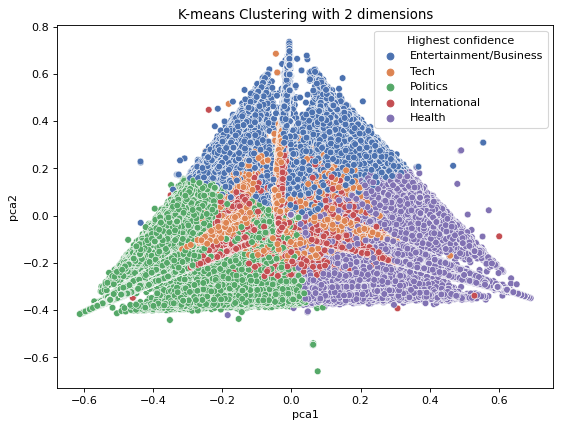

In [643]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x="pca1", y="pca2", hue=mix['Highest confidence'], data=results, palette="deep")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

##### Plotting based on the 'Cluster'from Kmeans

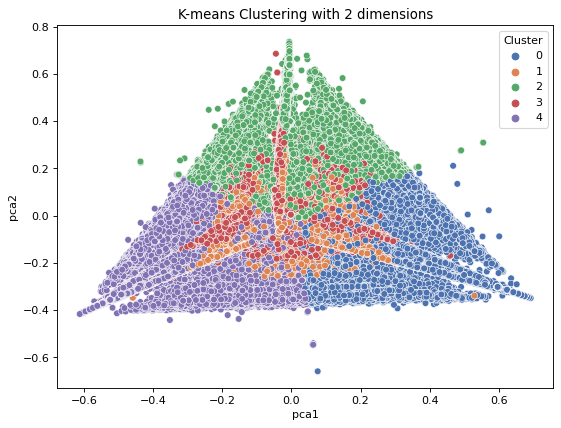

In [644]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x="pca1", y="pca2", hue=mix['Cluster'], data=results, palette="deep")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Saving

In [652]:
mix.to_csv('MIX.csv', index=False)
mix.to_csv('MIX+index.csv')

In [647]:
mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health', 'Cluster']].to_csv('MIX_spider01.csv', index=False)

In [648]:
mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health', 'Highest confidence']].to_csv('MIX_spider02.csv', index=False)

In [650]:
mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health', 'Highest confidence', 'Cluster']].to_csv('MIX_spider03.csv', index=False)

In [654]:
mix[['title', 'clean']].to_csv('title+clean.csv', index=False)
mix[['title', 'vectorized']].to_csv('title+vectorized.csv', index=False)
mix[['title', 'tdf_vectorized']].to_csv('title+tdf_vectorized.csv', index=False)
mix[['title','clean','vectorized', 'tdf_vectorized']].to_csv('title+clean+vectorized+tdf_vectorized.csv', index=False)

#### LDA with TF_LDF

In [656]:
mix['Entertainment/Business'] = np.nan
mix['Tech'] = np.nan
mix['International'] = np.nan
mix['Politics'] = np.nan
mix['Health'] = np.nan
mix['Highest confidence'] = np.nan
mix['Cluster'] = np.nan
mix.head()

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence,Cluster
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [657]:
mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204132 entries, 0 to 204131
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   title                   204129 non-null  object 
 1   clean                   204129 non-null  object 
 2   vectorized              204132 non-null  object 
 3   tdf_vectorized          204132 non-null  object 
 4   Entertainment/Business  0 non-null       float64
 5   Tech                    0 non-null       float64
 6   International           0 non-null       float64
 7   Politics                0 non-null       float64
 8   Health                  0 non-null       float64
 9   Highest confidence      0 non-null       float64
 10  Cluster                 0 non-null       float64
dtypes: float64(7), object(4)
memory usage: 18.7+ MB


In [658]:
mix['Highest confidence'] = mix['vectorized'].apply(lambda x: sorted(lda_idf[x],key=lambda xs: xs[1])[-1][0])
mix.replace({0: 'Entertainment/Business', 1: 'Tech', 2:'International', 3:'Politics', 4:'Health'}, inplace=True)
mix.head()

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence,Cluster
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517...",NaN,NaN,NaN,NaN,NaN,Entertainment/Business,NaN
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]",NaN,NaN,NaN,NaN,NaN,International,NaN
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810...",NaN,NaN,NaN,NaN,NaN,Politics,NaN
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492...",NaN,NaN,NaN,NaN,NaN,International,NaN
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927...",NaN,NaN,NaN,NaN,NaN,Entertainment/Business,NaN


In [659]:
mix['Entertainment/Business'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 0))).astype(float)
mix['Tech'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 1))).astype(float)
mix['International'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 2))).astype(float)
mix['Politics'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 3))).astype(float)
mix['Health'] = mix['vectorized'].apply(lambda x: (get_conf(lda[x], 4))).astype(float)
mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204132 entries, 0 to 204131
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   title                   204129 non-null  object 
 1   clean                   204129 non-null  object 
 2   vectorized              204132 non-null  object 
 3   tdf_vectorized          204132 non-null  object 
 4   Entertainment/Business  204132 non-null  float64
 5   Tech                    204132 non-null  float64
 6   International           204132 non-null  float64
 7   Politics                204132 non-null  float64
 8   Health                  204132 non-null  float64
 9   Highest confidence      204132 non-null  object 
 10  Cluster                 0 non-null       float64
dtypes: float64(6), object(5)
memory usage: 18.7+ MB


##### Clustering2

In [660]:
km = KMeans(n_clusters= 5, random_state= 42)
Clusters = km.fit_predict(mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health']])

In [661]:
mix['Cluster'] = Clusters
mix.head(20)

,title,clean,vectorized,tdf_vectorized,Entertainment/Business,Tech,International,Politics,Health,Highest confidence,Cluster
0,Agent Cooper in Twin Peaks is the audience: on...,"[agent, cooper, twin, peak, audienc, delight, ...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]","[(0, 0.3480650151787403), (1, 0.42091619754517...",0.587564,0.028728,0.326458,0.028664,0.028585,Entertainment/Business,1
1,"AI, the humanity!",[human],"[(6, 1)]","[(6, 1.0)]",0.104020,0.104768,0.100922,0.102310,0.100010,International,0
2,The Viral Machine,"[viral, machin]","[(7, 1), (8, 1)]","[(7, 0.6856827453884325), (8, 0.72790052388810...",0.066686,0.069061,0.066686,0.730742,0.066686,Politics,3
3,How Anker is beating Apple and Samsung at thei...,"[anker, beat, appl, samsung, accessori, game]","[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]","[(9, 0.6391980317756802), (10, 0.3537230897492...",0.558673,0.033510,0.033352,0.033454,0.340984,International,1
4,Tour Black Panther’s reimagined homeland with ...,"[tour, black, panther, reimagin, homeland, neh...","[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...","[(14, 0.23014573543762717), (15, 0.39767125927...",0.025654,0.025804,0.594263,0.329283,0.025024,Entertainment/Business,2
5,Instant recall,"[instant, recal]","[(21, 1), (22, 1)]","[(21, 0.7765192727938597), (22, 0.630093500188...",0.066692,0.732115,0.066956,0.066943,0.067296,Entertainment/Business,0
6,Massive attack,"[massiv, attack]","[(23, 1), (24, 1)]","[(23, 0.5442967408780569), (24, 0.838892757072...",0.066748,0.066996,0.731390,0.067276,0.067597,Tech,2
7,The Future Agency,"[futur, agenc]","[(25, 1), (26, 1)]","[(25, 0.754714585275623), (26, 0.6560532712914...",0.066670,0.066671,0.732965,0.066670,0.067024,Health,2
8,Flight Risk,"[flight, risk]","[(27, 1), (28, 1)]","[(27, 0.7133744632212213), (28, 0.700783044332...",0.067329,0.066783,0.727893,0.066737,0.071430,Health,2
9,Brain drain,"[brain, drain]","[(29, 1), (30, 1)]","[(29, 0.6140372319368165), (30, 0.789277060223...",0.732400,0.067547,0.066688,0.066688,0.066690,International,1


#### Applying PCA 2

In [662]:
reduced_data = PCA(n_components=2).fit_transform(mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health']])

In [663]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

##### Plotting based on the 'Highest confidence' from LDA with TF_LDF

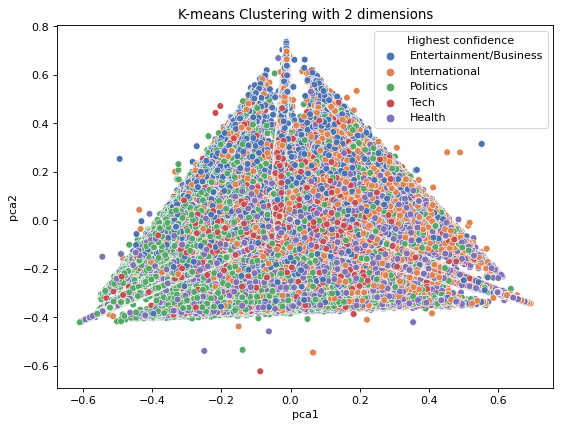

In [664]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x="pca1", y="pca2", hue=mix['Highest confidence'], data=results, palette="deep")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

##### Plotting based on the 'Cluster' from LDA with TF_LDF

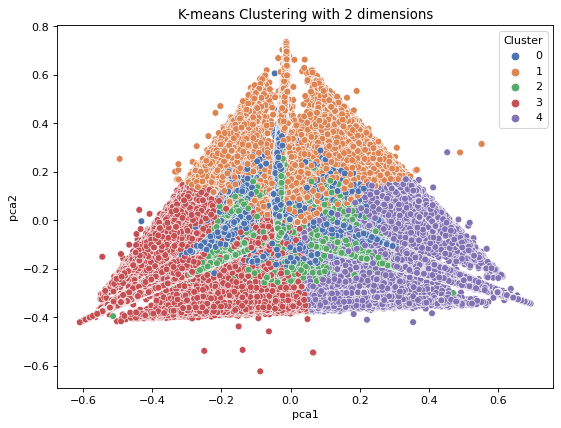

In [665]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x="pca1", y="pca2", hue=mix['Cluster'], data=results, palette="deep")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Saving

In [666]:
mix.to_csv('MIX.csv', index=False)
mix.to_csv('MIX+index.csv')
mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health', 'Cluster']].to_csv('MIX_spider01.csv', index=False)
mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health', 'Highest confidence']].to_csv('MIX_spider02.csv', index=False)
mix[['Entertainment/Business', 'Tech', 'International', 'Politics', 'Health', 'Highest confidence', 'Cluster']].to_csv('MIX_spider03.csv', index=False)
mix[['title', 'clean']].to_csv('title+clean.csv', index=False)
mix[['title', 'vectorized']].to_csv('title+vectorized.csv', index=False)
mix[['title', 'tdf_vectorized']].to_csv('title+tdf_vectorized.csv', index=False)
mix[['title','clean','vectorized', 'tdf_vectorized']].to_csv('title+clean+vectorized+tdf_vectorized.csv', index=False)